### Smart Add A/B - testing project overview

<p>A/B testing, also known as split testing, refers to a randomized experimentation process wherein two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drive business metrics.</p>
<p>Smart Add decided to measure and collect experiment data where they tracked visitors that were served two different type of ads.

The best tests for campaign or site optimization take a simple approach to testing. This allows a clear objective to be realized and avoids a tendency many researchers have to test for too many variables.
The question we are testing is simply put, “Does the exposed group click the Bio button at a higher rate than the control group?” I will follow AB test approach and test two oposite hipotesis</p>
                              
![Yes NO](buttons.png)

<p><b>Hipothesis:</b><br>
<b>Hypothesis Hₒ: p = pₒ </b> "There is no significant difference between the ad success rate of both groups"<br>
<b>Alternative Hypothesis Hₐ: p ≠ pₒ</b> "There is significant difference between the ad success rate of both groups"<br>
Confidence Level: (p=0.05)</p>

<p><b>Columns Description:</b><br>
<b>auction_id:</b> the unique id of the online user.<br>
<b>experiment:</b> Users group to control or exposed.<br>
<b>control:</b> users who have been shown a dummy ad<br>
<b>exposed:</b> users who have been shown a SmartAd brand.<br>
<b>date:</b> the date in YYYY-MM-DD format<br>
<b>hour:</b> the hour of the day in HH format.<br>
<b>device_make:</b> the name device<br>
<b>platform_os :</b> the id of the OS the user has<br>
<b>browser:</b> the name of the browser that user used<br>
<b>yes:</b> 1 if the user chooses the “Yes” radio button for the BIO questionnaire.<br>
<b>no:</b>1 if the user chooses the “No” radio button for the BIO questionnaire.</p>
<a href="https://www.kaggle.com/osuolaleemmanuel">Link to raw data</a>

In [1]:
# Importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import date
from scipy import stats
from random import sample
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings(action='once')

In [2]:
# Load data to data frame
link = (r"C:\Users\Piotr\Documents\DS projects\resume_projects\AB testing\AdSmartABdata.csv")
df = pd.read_csv(link, header=0, parse_dates=['date'])

# Show the first few rows
df.head(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1


In [3]:
# Show size of data frame
df.shape

(8077, 9)

## Data preprocessing

In [4]:
# Check null values in data frame
total_nulls = df.isnull().sum()
print(f'The total null values:\n{total_nulls}')

The total null values:
auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64


In [5]:
# Count distinct values for auction_id (user)
df['auction_id'].nunique()

8077

In [6]:
# Create data frame only for users that react to BIO buttons yes and no.
yes_users = df.loc[df['yes'] == 1]
no_users = df.loc[df['no'] == 1]
df = yes_users.append([no_users])


print(f'Sum of all users that response to button yes or no: {df.shape[0]}')
df.head()

Sum of all users that response to button yes or no: 1243


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [7]:
# Check data frame variables type
df.dtypes

auction_id             object
experiment             object
date           datetime64[ns]
hour                    int64
device_make            object
platform_os             int64
browser                object
yes                     int64
no                      int64
dtype: object

Let's investigate vairable: device_make and browser. This variables might give more insight about users.

In [8]:
# Show sum of browsers that in data frame
print(f'Sum of values for browser:\n{df.browser.value_counts()}')

Sum of values for browser:
Chrome Mobile                 695
Chrome Mobile WebView         227
Facebook                      156
Samsung Internet              145
Mobile Safari                  14
Mobile Safari UI/WKWebView      3
Chrome                          2
Chrome Mobile iOS               1
Name: browser, dtype: int64


Data for browsers are a bit messy. I will make sure to keep one name  per browser. I also noticed Facebook is not browser but social media platform. Furthermore, I will create new variable called app (applications) and keep Facebook data.

In [9]:
# Create new vairable app to clean data in browser vairable
df['app'] = df['browser'].apply(lambda x: x.replace(' Mobile', '' )
                                        .replace(' WebView', '').replace('Mobile ', '')
                                        .replace(' UI/WKWebView', '').replace(' iOS', ''))
# Show values for applications.
print(f'Sum of values for applications:\n{df.app.value_counts()}')

Sum of values for applications:
Chrome              925
Facebook            156
Samsung Internet    145
Safari               17
Name: app, dtype: int64


In [10]:
# One Hot Encoder for application variable
ord_enc = OrdinalEncoder()
df['app_code'] = ord_enc.fit_transform(df[['app']])
df[['app', 'app_code']].head(5)

# Show values counts for applications.
print(f'Sum of values for applications:\n{df.app_code.value_counts()}')

Sum of values for applications:
0.0    925
1.0    156
3.0    145
2.0     17
Name: app_code, dtype: int64


In [11]:
# Show values counts for devices.
print(f'Sum of values for devices:\n{df.device_make.value_counts()}')

Sum of values for devices:
Generic Smartphone    719
Samsung SM-G960F       45
Samsung SM-G950F       35
Samsung SM-G973F       22
iPhone                 18
                     ... 
XiaoMi MI 8 Pro         1
EVR-N29                 1
Samsung SM-G610F        1
SNE-LX1                 1
IMO $2                  1
Name: device_make, Length: 115, dtype: int64


In [12]:
# Split device string, show top 10 values
df['device_make_new'] = df['device_make'].str.split(' ', 1).str[0]
df.device_make_new.value_counts().head(10)

Generic      719
Samsung      367
iPhone        18
LG-$2         11
Pixel         11
Nokia         11
Nokia$2$3      9
POT-LX1        8
XiaoMi         6
I3312          6
Name: device_make_new, dtype: int64

Im going to keep top 6 of devices rest of devices I will rename to "Other" . As there is quite long list of devices I will apply mask to replace this values.

In [13]:
# Create new vairable that will represent devices
mask = pd.DataFrame(df.device_make_new.value_counts() < 10)[6:].index.to_list()
df['device_make_new'].replace(list(mask), 'Other', inplace=True,)
print(f'Sum of values for browser:\n{df.device_make_new.value_counts()}')

Sum of values for browser:
Generic    719
Samsung    367
Other      106
iPhone      18
LG-$2       11
Pixel       11
Nokia       11
Name: device_make_new, dtype: int64


In [14]:
# One Hot Encoder for device variable
df['device_make_new_code'] = ord_enc.fit_transform(df[['device_make_new']])
df[['device_make_new', 'device_make_new_code']].head(5)

# Show values for applications.
print(f'Sum of values for applications:\n{df.device_make_new_code.value_counts()}')

Sum of values for applications:
0.0    719
5.0    367
3.0    106
6.0     18
4.0     11
2.0     11
1.0     11
Name: device_make_new_code, dtype: int64


In [15]:
# Drop adjusted columns
df.drop(['device_make','browser', 'device_make_new', 'app'], inplace=True, axis=1)
df.tail(3)

,auction_id,experiment,date,hour,platform_os,yes,no,app_code,device_make_new_code
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,6,0,1,0.0,0.0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,6,0,1,0.0,0.0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,6,0,1,0.0,0.0


## EDA Visualisations

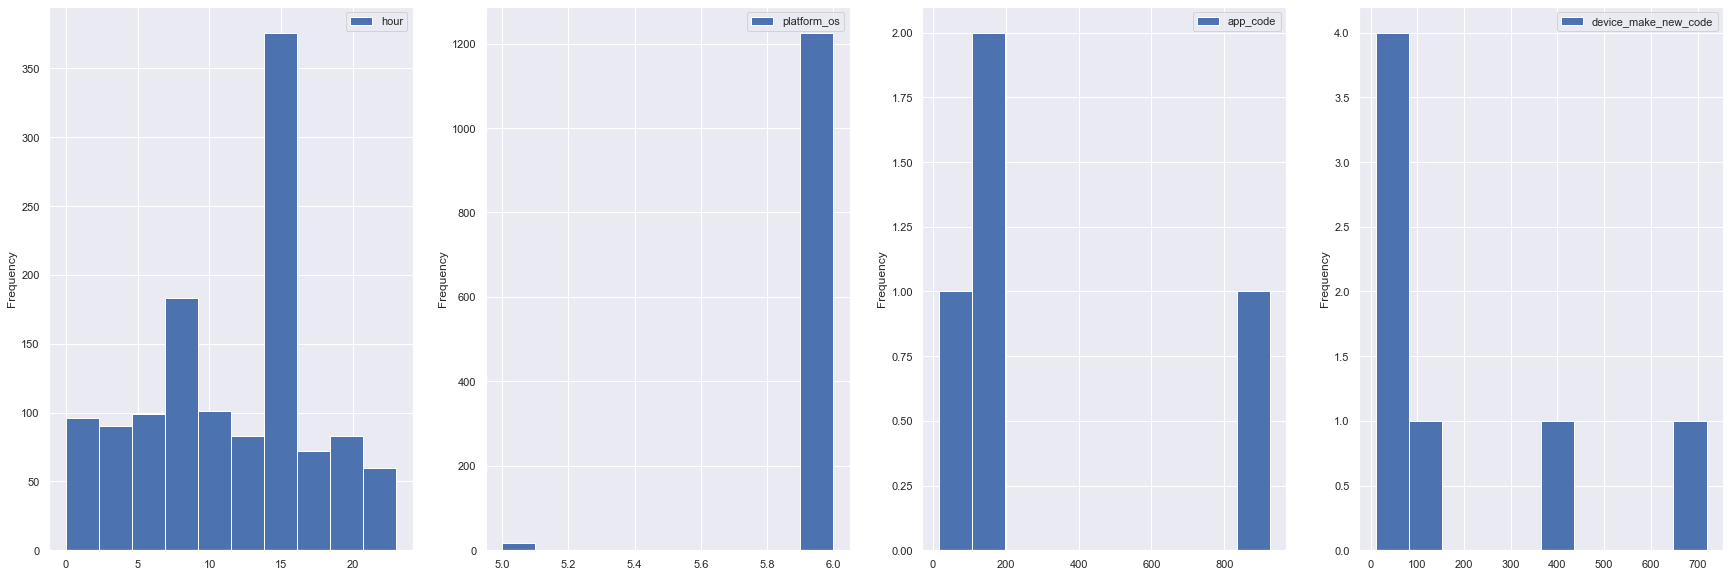

In [16]:
# Plot Histogram for for numeric vairables
sns.set(rc={'figure.figsize':(30,10)})
fig, ax = plt.subplots(1,4)
df.hour.plot(kind='hist', ax=ax[0], legend=True,)
df.platform_os.plot(kind='hist', ax=ax[1], legend=True,)
df.app_code.value_counts().plot(kind='hist', ax=ax[2], legend=True,)
df.device_make_new_code.value_counts().plot(kind='hist', ax=ax[3], legend=True,)
plt.show()

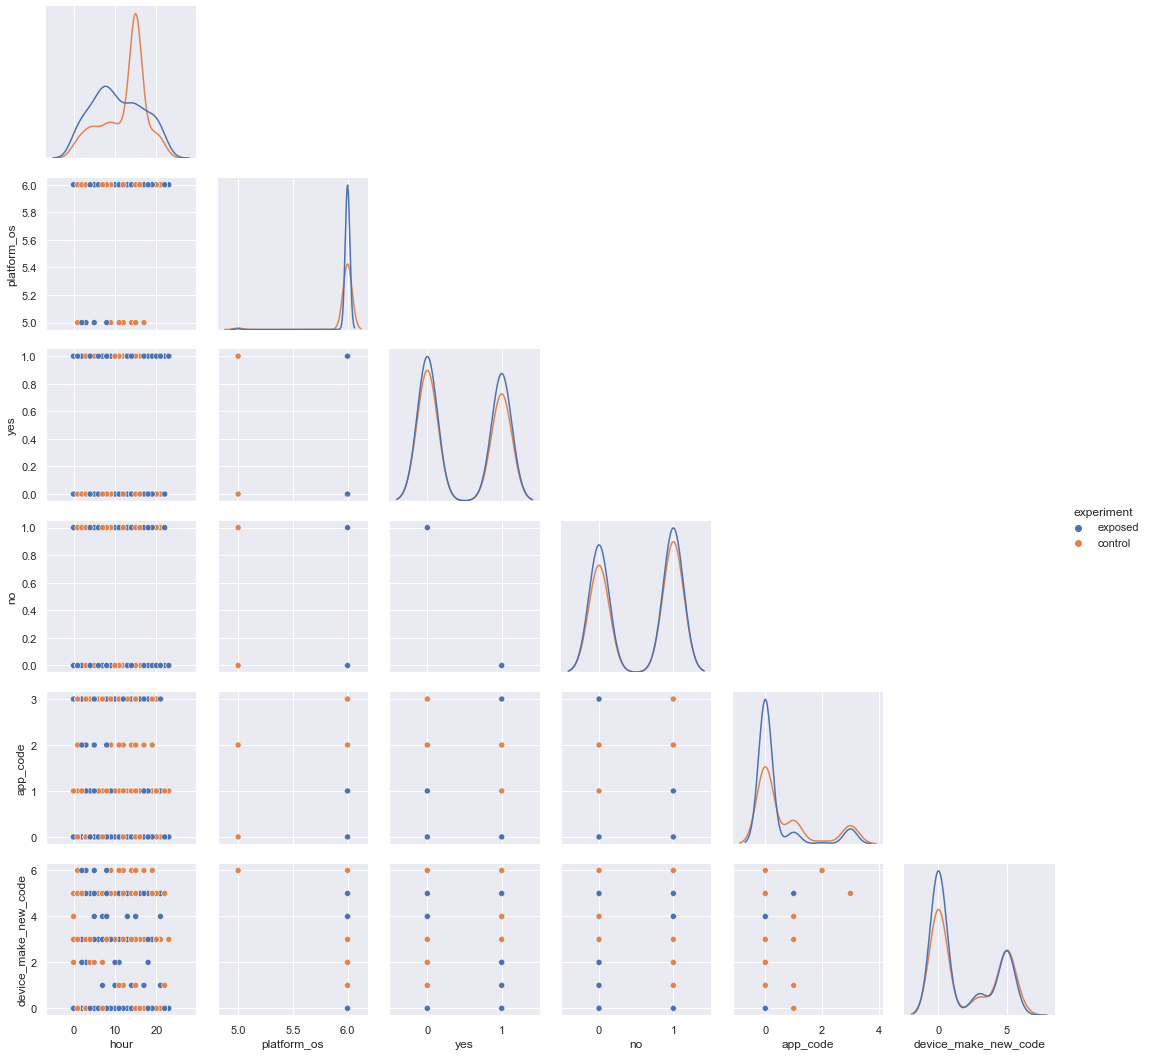

In [17]:
#Plot  kernel density estimation and scater for numeric vairables
g = sns.PairGrid(df, diag_sharey=False, corner=True, hue='experiment')
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.add_legend()

The distribution of experiment data for the hour and application are showing quite a significant difference between the user's group. Also, device make are showing some differences in the distribution of both group users. There visible differences for yes and no distribution in both variables exposed group seams to reach a higher value. Let's check some statistics.

In [18]:
# Show basic statistic
df.describe()

,hour,platform_os,yes,no,app_code,device_make_new_code
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,11.520515,5.986323,0.460177,0.539823,0.502816,1.880933
std,5.765704,0.116191,0.498612,0.498612,0.988965,2.307025
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,1.000000,0.000000,0.000000
75%,15.000000,6.000000,1.000000,1.000000,1.000000,5.000000
max,23.000000,6.000000,1.000000,1.000000,3.000000,6.000000


## Statistic AB testing

In [19]:
# Sum the number of users in Experiment for each group.
df.pivot_table(values=['yes', 'no'], index=['experiment'], aggfunc=[np.sum])


sum     
             no  yes
experiment          
control     322  264
exposed     349  308

In [20]:
# Mean value of users in Experiment for each group.
df.pivot_table(values=['yes', 'no'], index=['experiment'], aggfunc=[np.mean])

mean          
                  no       yes
experiment                    
control     0.549488  0.450512
exposed     0.531202  0.468798

Mean values in the exposed group for both user responses to choose the “Yes” or “No” 
BIO buttons are slightly higher than in the control group. It's a small difference, but even small changes in users reactions can have a large impact. But while I'm certain of the difference in the data, how certain should I be that this is promising for Ad success. Let's investigate further.

In [21]:
# Statistics run Z test for yes variables
from scipy.stats import norm

# Z test for a singe mean value
n= df['yes'].shape[0]
yes_mean = df['yes'].mean()
std_err= df['yes'].std(ddof=1)/n**0.5

#Calculate Z statistic
zhat = (yes_mean-0)/std_err
print(zhat)

32.53850178420407


In [22]:
# Calculate 95 confidence intervals using Z distribution
alpha = 0.05
z_left = norm.ppf(alpha/2)
z_right = norm.ppf(1-alpha/2)

#Define intervals
interval_l = yes_mean+ z_left*std_err
interval_r = yes_mean+ z_right*std_err
print(f'95% confidence intervals is: {(interval_l, interval_r)}')

# Probability test Z differend than 0
pvalue = 1-2*(1 - norm.cdf(np.abs(zhat)))
print(f'Probability Z test differend than 0 is:{pvalue}')

# Probability test Z possitive
pvalue_1 = norm.cdf(np.abs(zhat))
print(f'Probability Z test is possitive is:{pvalue_1}')


95% confidence intervals is: (0.43245812642979575, 0.4878958558710892)
Probability Z test differend than 0 is:1.0
Probability Z test is possitive is:1.0


Z Test Conclusion
P values equal 1 for Z test different than )  and Z test possitive suggests no difference between the groups other than due to chance. Another reason for this results is size of sample observation. I focus on observation when user used buttons "yes" and "no". Once I removed from the dataset all observations with no answer (6834 observations) I have only 1243 observations available for test. Lets check proportion for Z tes and calculate p-value

In [23]:
#Import proportion for Z test
from statsmodels.stats.proportion import proportions_ztest

# Create data frames for each group
df_control = df[df.experiment =='control']
df_exposed = df[df.experiment =='exposed']

# Create successes on each group
yes_sum = [df_control.yes.sum(), df_exposed.yes.sum()]

# Create observations on each group
yes_count= [df_control.yes.count(), df_exposed.yes.count()]

# Create p-value of the ad_success distribution
z_stat, pval = proportions_ztest(yes_sum, nobs=yes_count)

print(f'The p-value of ad_success is: {(pval.round(4))}')

The p-value of ad_success is: 0.5185


The p-value for 'ad_success' is equal 0.5185. P value is  above the confidence level 0.05. That's suggest that I can not reject the 'Null Hypothesis' (Hₒ: p = pₒ) , which stated that there is no significant difference between the two groups. I also cannot prove Alternative Hypothesis Hₐ: p ≠ pₒ which stated that there is significant difference between the ad success rate of both groups. Let's try bootstrap technique that will produce more mean samples and calculate probability based on 'generated data.

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. This technique will help me to resample small data set observation to produce more observation for mean value.

Text(0, 0.5, '%')

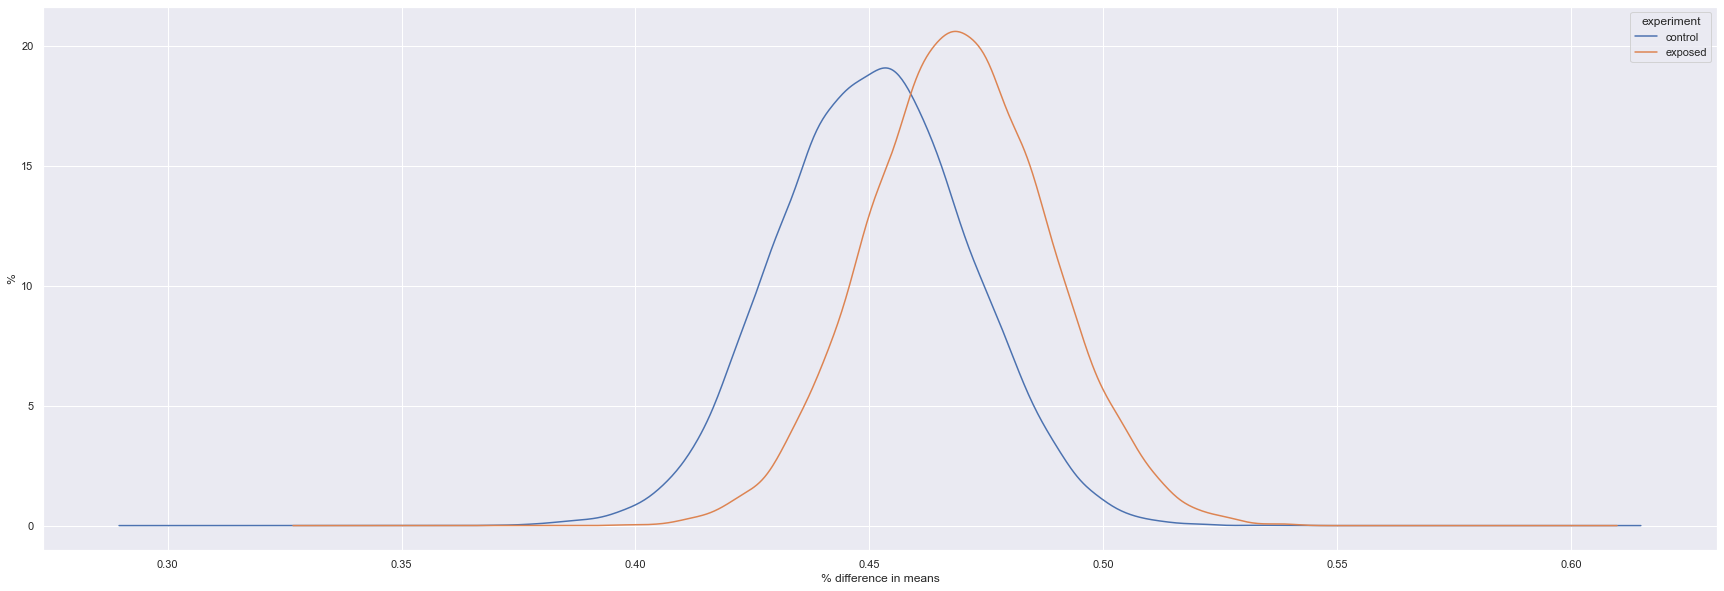

In [24]:
# Creating an list with bootstrapped means for control and exposed users that used yes button
boot_yes = []
for i in range(10000):
    boot_mean = df.sample(frac=1, replace=True).groupby('experiment')['yes'].mean()
    boot_yes.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_yes = pd.DataFrame(boot_yes)
    
# A Kernel Density Estimate plot of the bootstrap distributions
ax = boot_yes.plot(kind='kde')
ax.set_xlabel("% difference in means")
ax.set_ylabel("%")

These two distributions above represent the bootstrap uncertainty over what the underlying user reaction for yes button could be. Just observing this plot, I can see that there seems to be some evidence of a difference betwen two group users. The mean difference is in a favour to exposed users. Let's zoom in on the difference between the group users.

C:\Users\Piotr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.746965485698206


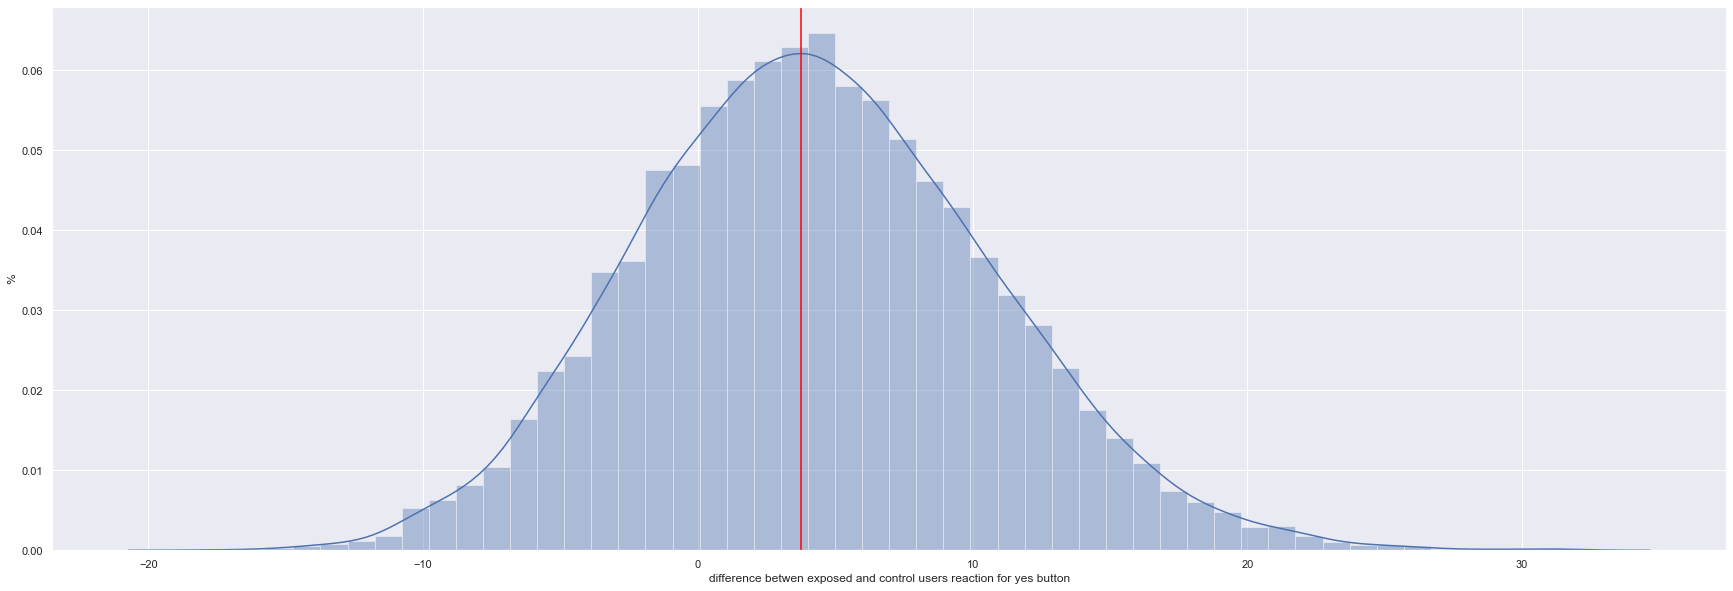

In [25]:
# Adding a column with the % difference between the control and exposed users
boot_yes['diff'] = (boot_yes['exposed'] - boot_yes['control']) /  boot_yes['control'] * 100


# Ploting the bootstrap % difference
ax = sns.distplot(boot_yes['diff'], kde = True)

# Compute the Gaussian KDE
kde = stats.gaussian_kde(boot_yes['diff'])
# Get the index of the maximum
idx = np.argmax(kde.pdf(boot_yes['diff']))

# Plot a vertical line at corresponding x
plt.axvline(boot_yes['diff'][idx], color='red') 

ax.set_xlabel( "difference betwen exposed and control users reaction for yes button")
ax.set_ylabel("%")

print(boot_yes['diff'][idx])

From this chart, I can see that the % of difference is around 3%, and that most of the distribution is above 0%, in favor of exposed users. But what is the probability that the difference is above 0%? Let's calculate that as well.

In [26]:
# Calculating the probability that user reaction for yes button is greater for exposed users.
prob = (boot_yes['diff'] > 0).mean()

# Pretty printing the probability
print('Probability of a difference in favor of a yes button for exposed users is: {0:.0%}'.format(prob))

Probability of a difference in favor of a yes button for exposed users is: 74%


## <p>Final conclusion:<br>

The bootstrap analysis tells me that there is a 74% probability that exposed users have strong reaction for new ad design.  74% probability means that the chance that I'm wrong is 26%
This indicates the differences between the 'ad' shown to the 'control' group, and the 'creative ad' shown to the 'exposed' group can convert into better ad performance.</p> 
## <p>Business recommendation:<br>
One of the option to consider might be to collect more data for the same experiment to produce better probability.<br>
Another option to consider should be to change approach with  using BIO button. To register and provide personal information by user  require effort and  is not attractive (more than 6k user ignored it completely in experiment).<br> 
I would use like or not like buttons instead, they are more user-friendly. After all, we want to know if users react positively or not to the new add. Collecting personal information its not necessery at this stage.</p>